<a href="https://colab.research.google.com/github/StephenBrom54/MLA_SEB/blob/main/MLA1_SEB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Machine Learning Assignment 1
#Stephen Brom
#CS430-ON
#Machine Learning in the Cloud


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from google.colab import drive
drive.mount ("/content/gdrive")

df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv' )

Mounted at /content/gdrive


In [ ]:
df.head(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
df.tail(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
def get_random_lines(df, n=5):
    indices = np.random.choice(df.index, n, replace=False)
    return df.loc[indices]
random_lines = get_random_lines(df)
print(random_lines)

             Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
4052   6/17/2012 20:00      24.5                15.1           56   
1238   2/21/2012 14:00       1.9                -6.2           55   
3504    5/26/2012 0:00      19.8                14.8           73   
3255   5/15/2012 15:00      17.8                15.2           85   
7578  11/11/2012 18:00       3.3                 1.1           85   

      Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)        Weather  
4052               15             48.3           100.95         Cloudy  
1238               22             48.3           100.95  Mostly Cloudy  
3504                9             25.0           101.00          Clear  
3255                9             16.1           100.95   Rain Showers  
7578               13             25.0           102.13   Mainly Clear  


In [ ]:
columns_list = df.columns.tolist()
(columns_list)

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

In [ ]:
df = df.rename(columns={
    'Date/Time': 'date_time',
    'Temp (C)': 'temp_c',
    'Dew Point Temp (C)': 'dew_point',
    'Rel Hum (%)': 'relative_humidity',
    'Wind Spd (km/h)': 'wind_speed',
    'Visibility (km)': 'visibility',
    'Stn Press (kPa)': 'pressure',
    'Weather': 'weather'
})

print(df.head())

       date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00    -1.8       -3.9                 86           4   
1  1/1/2012 1:00    -1.8       -3.7                 87           4   
2  1/1/2012 2:00    -1.8       -3.4                 89           7   
3  1/1/2012 3:00    -1.5       -3.2                 88           6   
4  1/1/2012 4:00    -1.5       -3.3                 88           7   

   visibility  pressure               weather  
0         8.0    101.24                   Fog  
1         8.0    101.24                   Fog  
2         4.0    101.26  Freezing Drizzle,Fog  
3         4.0    101.27  Freezing Drizzle,Fog  
4         4.8    101.23                   Fog  


In [ ]:
statistics = df.describe()
print(statistics)

            temp_c    dew_point  relative_humidity   wind_speed   visibility  \
count  8784.000000  8784.000000        8784.000000  8784.000000  8784.000000   
mean      8.798144     2.555294          67.431694    14.945469    27.664447   
std      11.687883    10.883072          16.918881     8.688696    12.622688   
min     -23.300000   -28.500000          18.000000     0.000000     0.200000   
25%       0.100000    -5.900000          56.000000     9.000000    24.100000   
50%       9.300000     3.300000          68.000000    13.000000    25.000000   
75%      18.800000    11.800000          81.000000    20.000000    25.000000   
max      33.000000    24.400000         100.000000    83.000000    48.300000   

          pressure  
count  8784.000000  
mean    101.051623  
std       0.844005  
min      97.520000  
25%     100.560000  
50%     101.070000  
75%     101.590000  
max     103.650000  


In [ ]:
df['temp_f'] = df['temp_c'] * 9/5 + 32
print(df.head())

       date_time  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00    -1.8       -3.9                 86           4   
1  1/1/2012 1:00    -1.8       -3.7                 87           4   
2  1/1/2012 2:00    -1.8       -3.4                 89           7   
3  1/1/2012 3:00    -1.5       -3.2                 88           6   
4  1/1/2012 4:00    -1.5       -3.3                 88           7   

   visibility  pressure               weather  temp_f  
0         8.0    101.24                   Fog   28.76  
1         8.0    101.24                   Fog   28.76  
2         4.0    101.26  Freezing Drizzle,Fog   28.76  
3         4.0    101.27  Freezing Drizzle,Fog   29.30  
4         4.8    101.23                   Fog   29.30  


In [ ]:
df = df[['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']]
print(df.head())

       date_time  temp_f  temp_c  dew_point  relative_humidity  wind_speed  \
0  1/1/2012 0:00   28.76    -1.8       -3.9                 86           4   
1  1/1/2012 1:00   28.76    -1.8       -3.7                 87           4   
2  1/1/2012 2:00   28.76    -1.8       -3.4                 89           7   
3  1/1/2012 3:00   29.30    -1.5       -3.2                 88           6   
4  1/1/2012 4:00   29.30    -1.5       -3.3                 88           7   

   visibility  pressure               weather  
0         8.0    101.24                   Fog  
1         8.0    101.24                   Fog  
2         4.0    101.26  Freezing Drizzle,Fog  
3         4.0    101.27  Freezing Drizzle,Fog  
4         4.8    101.23                   Fog  


In [ ]:
df.dtypes

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.dtypes

date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object

In [ ]:
df['month'] = df['date_time'].dt.month
monthly_avg = df.groupby('month')['temp_f'].mean()
monthly_avg

month
1     18.731290
2     24.395000
3     37.618226
4     44.616750
5     61.227984
6     68.241250
7     73.022097
8     72.102742
9     61.672000
10    51.718952
11    33.676500
12    26.048629
Name: temp_f, dtype: float64

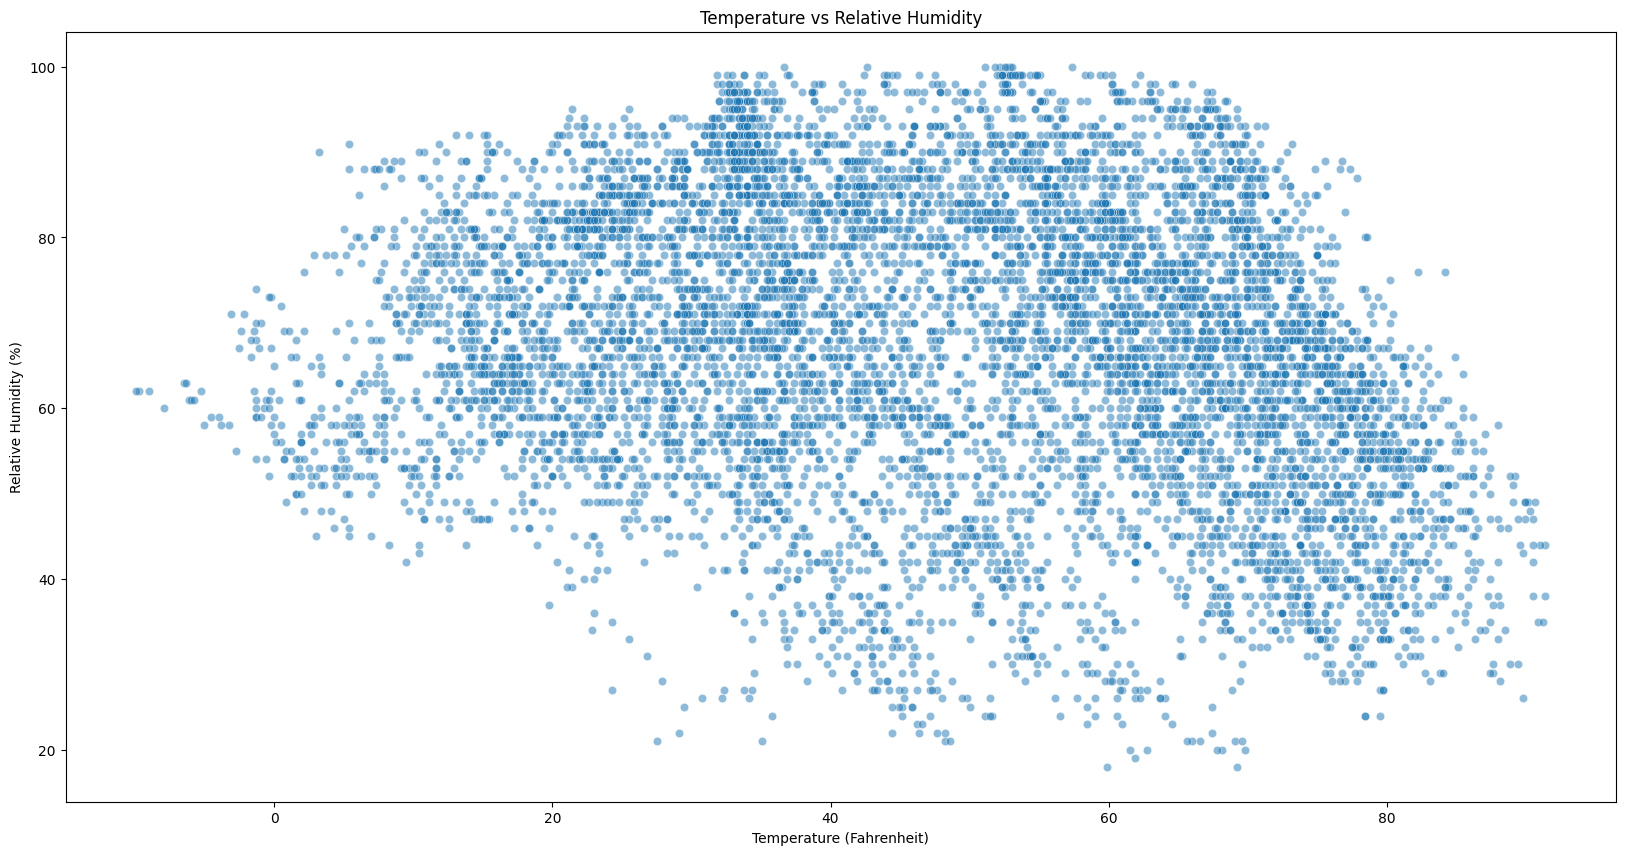

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x='temp_f', y='relative_humidity', alpha=0.5)
plt.title('Temperature vs Relative Humidity')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Relative Humidity (%)')
plt.show()

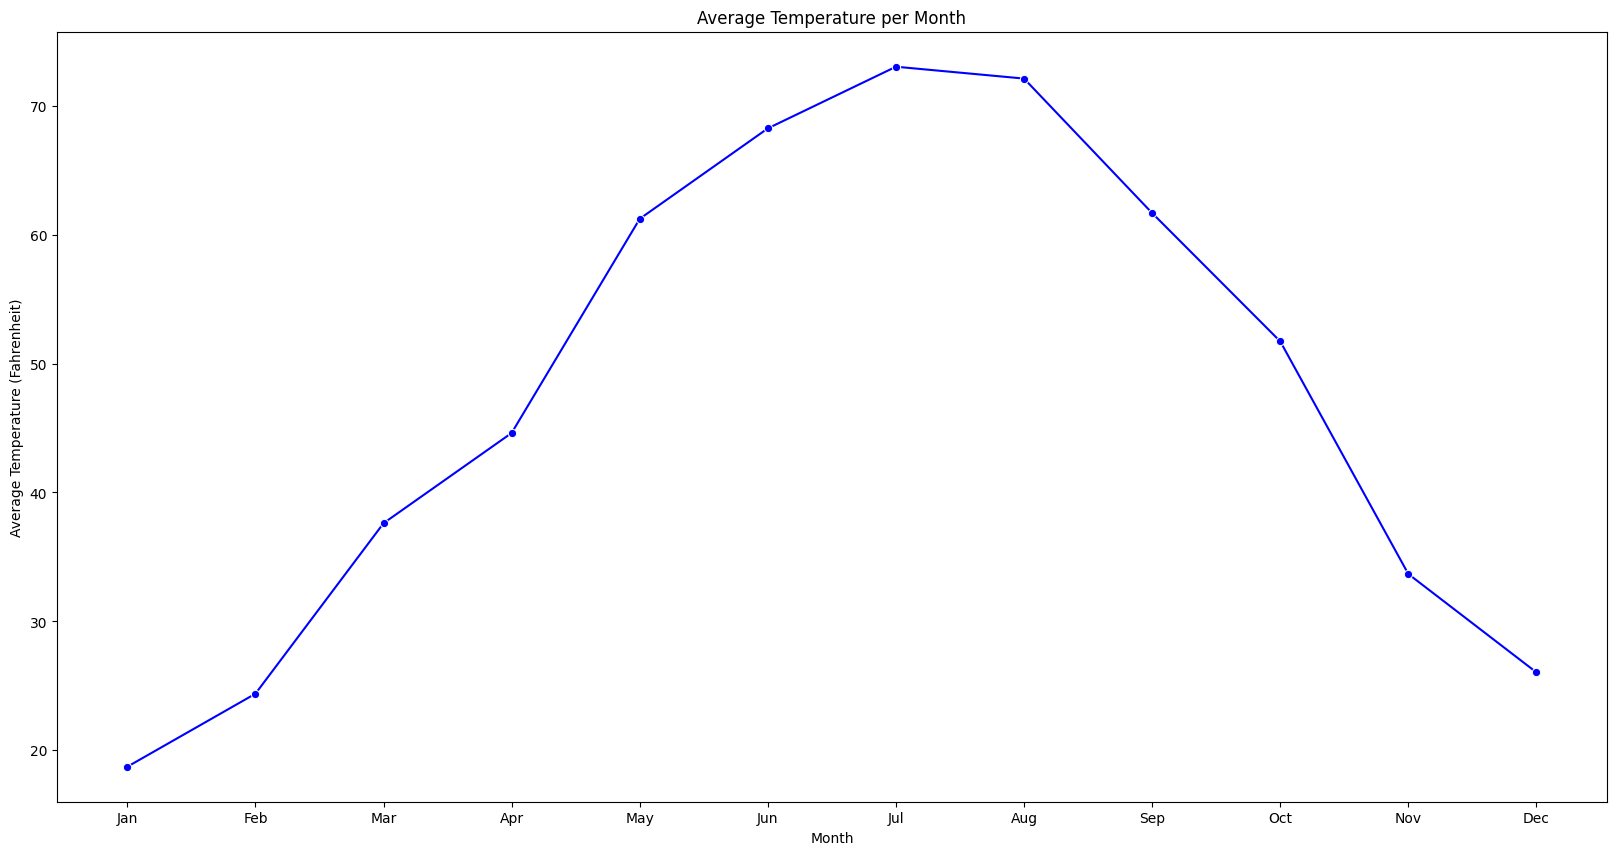

In [ ]:
plt.figure(figsize=(20, 10))
monthly_avg_temp = df.groupby(df['date_time'].dt.month)['temp_f'].mean()
sns.lineplot(data=monthly_avg_temp, marker='o', color='blue')
plt.title('Average Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

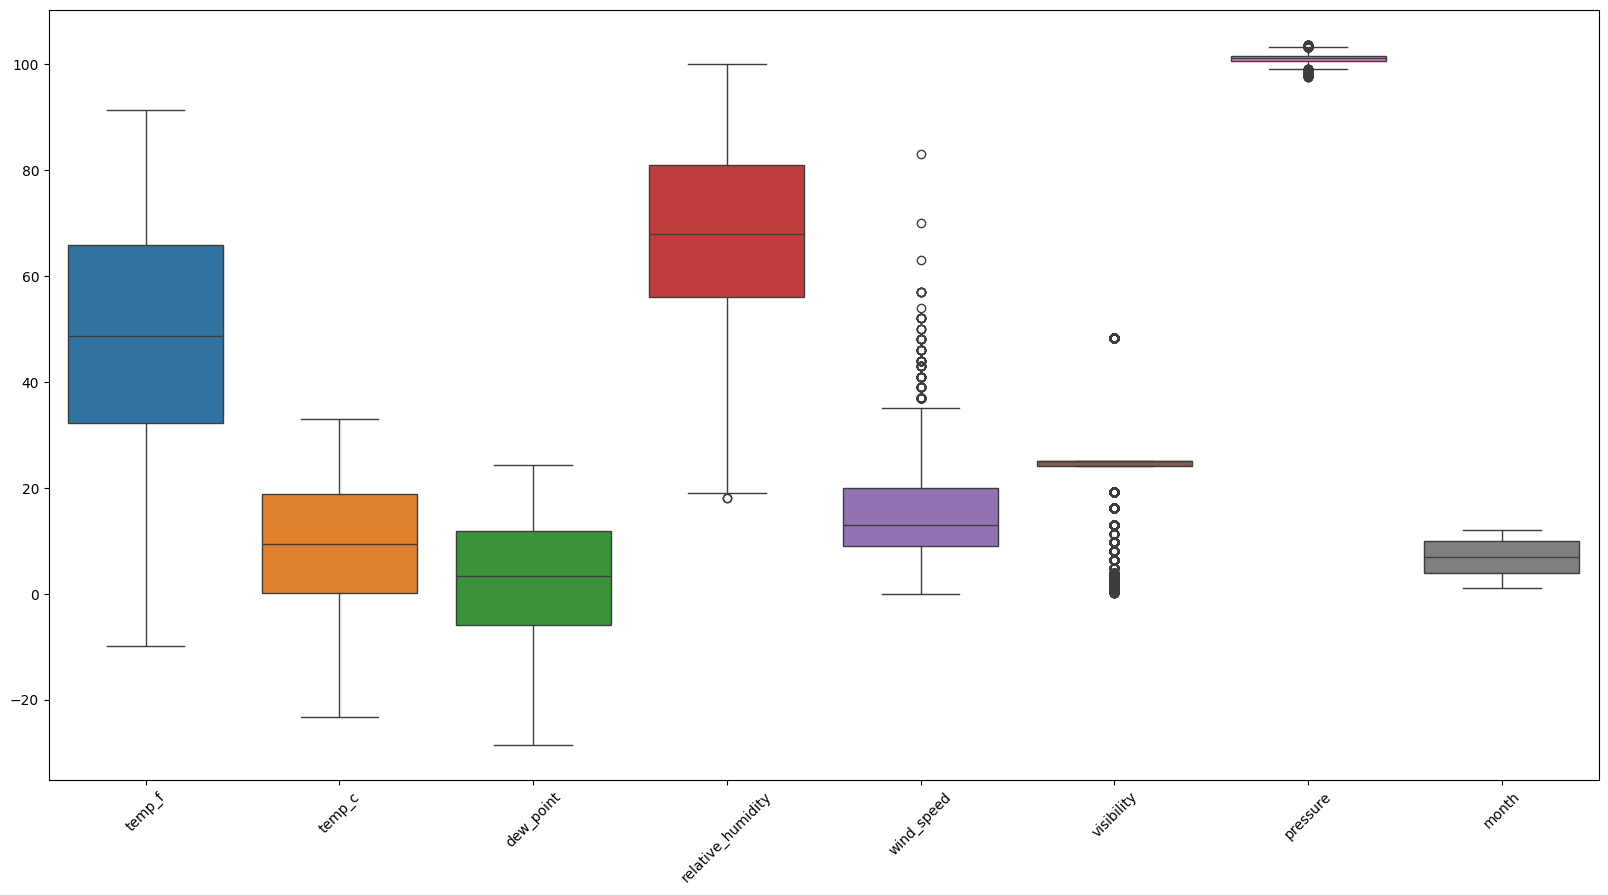

In [ ]:
columns_to_plot = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=45)
plt.show()